## __**Importing the needed libraries**__

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## __**Data pre-processing**__

In [10]:
# Read the data file
data = pd.read_csv(r'..\datasets\Salary_dataset.csv')

In [11]:
print("Missing values:\n", data.isna().sum())
print("Duplicated rows:", data.duplicated().sum())

Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64
Duplicated rows: 0


In [12]:
data.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


## __**ML linear regression algorithm**__

<span style="color:red; font-size:25px;">**Min-max scaling..**</span>

In [13]:
data['YearsExperience_scaled'] = (data['YearsExperience'] - data['YearsExperience'].min()) / (data['YearsExperience'].max() - data['YearsExperience'].min())
data['Salary_scaled'] = (data['Salary'] - data['Salary'].min()) / (data['Salary'].max() - data['Salary'].min())

<span style="color:red; font-size:25px;">**Calculate error..**</span>

In [14]:
def error (Y, X, B0, B1) :
    error = Y - (B0 - B1*X)  # error => Y - Y^
    return error

<span style="color:red; font-size:25px;">**calculate the errors cost..**</span>

In [15]:
def loss_func (data, B0, B1) :
    # declare sum square error
    SSE = 0
    
    n = len(data)
    for i in range(n):
        # declare variables
        Y = data.iloc[i].Salary_scaled
        X = data.iloc[i].YearsExperience_scaled
        
        SSE += (error(Y, X, B0, B1)) ** 2
        
    MES = SSE / 2 * n
    return MES

<span style="color:red; font-size:25px;">**Compute gradients (to optimizing the loss function)
..**</span>

In [16]:
def gradient (data, B0, B1) :
    B0_gradient = 0
    B1_gradient = 0
    
    n = len(data)
    for i in range(n) :
        # declare variables
        Y = data.iloc[i].Salary_scaled
        X = data.iloc[i].YearsExperience_scaled
        
        residual = error(Y, X, B0, B1)
        B0_gradient += -2 * residual
        B1_gradient += -2 * X * residual
        
    B0_gradient /= n
    B1_gradient /= n    
    return B0_gradient, B1_gradient

<span style="color:red; font-size:25px;">**Perform gradient descent algorithm
..**</span>

In [17]:
def gradient_descent (data, B0_old, B1_old, lr):
    
    B0_gradient, B1_gradient = gradient(data, B0_old, B1_old)
    
    # calculate step size
    B0_step_size = B0_gradient * lr
    B1_step_size = B1_gradient * lr
    
    B0_new = B0_old - B0_step_size
    B1_new = B1_old - B1_step_size
    
    return B0_new, B1_new

<span style="color:red; font-size:25px;">**Visualize the regression line..**</span>

In [18]:
def plot_regression(data, B0, B1, iteration, loss, x_min, x_max, y_min, y_max):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of scaled data
    plt.scatter(data['YearsExperience_scaled'], data['Salary_scaled'], color='blue', label='Data Points')
    
    # Regression line
    X = np.array(data['YearsExperience_scaled'])
    Y_pred = B0 + B1 * X
    plt.plot(X, Y_pred, color='red', label=f'Regression Line (B0={B0:.2f}, B1={B1:.2f})')
    
    # Set fixed axis limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title(f'Iteration {iteration}, Loss: {loss:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

<span style="color:red; font-size:25px;">**Train linear regression model with gradient descent..**</span>

In [19]:
def linear_regression(data, B0, B1, lr, tolerance=1e-6, max_iterations=10000):
    # Compute axis limits with padding for scaled data
    x_min = y_min = 0.0
    x_max = y_max = 1.0
    x_padding = y_padding = 0.2
    x_min, x_max = x_min - x_padding, x_max + x_padding
    y_min, y_max = y_min - y_padding, y_max + y_padding

    iteration = 0
    history = []

    previous_loss = float('inf')

    while iteration < max_iterations:
        B0_gradient, B1_gradient = gradient(data, B0, B1)

        if abs(B0_gradient) < tolerance and abs(B1_gradient) < tolerance:
            current_loss = loss_func(data, B0, B1)
            history.append((iteration + 1, B0, B1, current_loss))
            print(f"Converged at iteration {iteration+1} | Loss = {current_loss:.6f}")
            break

        B0, B1 = gradient_descent(B0_old=B0, B1_old=B1, lr=lr, data=data)
        current_loss = loss_func(data, B0, B1)

        # Stop if Loss is increasing consecutively
        if current_loss > previous_loss:
            break

        previous_loss = current_loss
        history.append((iteration + 1, B0, B1, current_loss))

        if (iteration + 1) % 1 == 0:
            plot_regression(data, B0, B1, iteration + 1, current_loss, x_min, x_max, y_min, y_max)

        iteration += 1

    return B0, B1, history


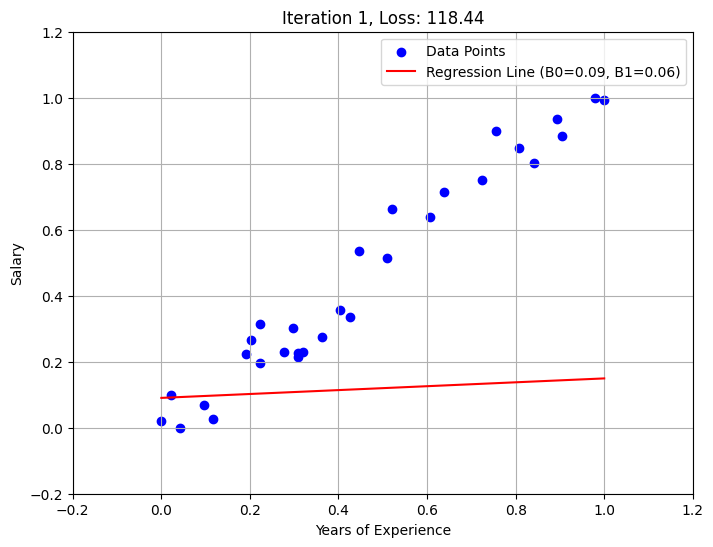

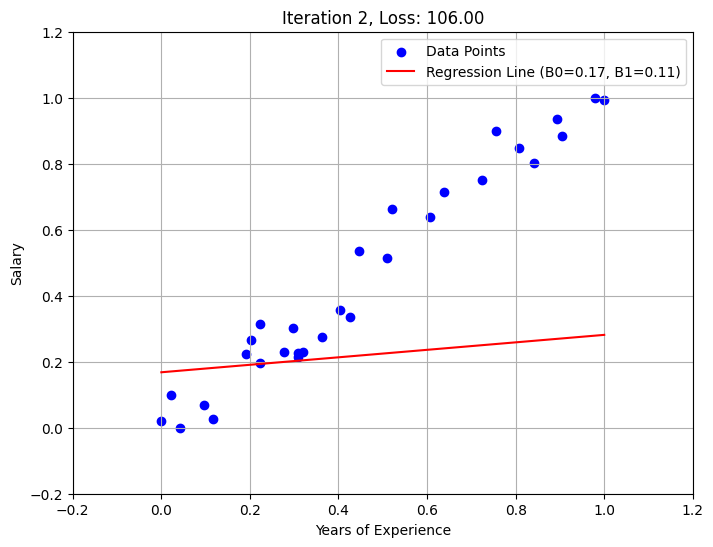

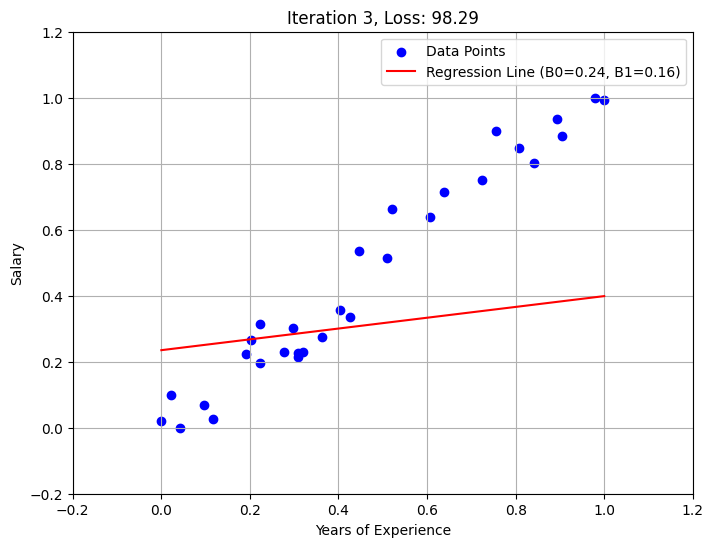

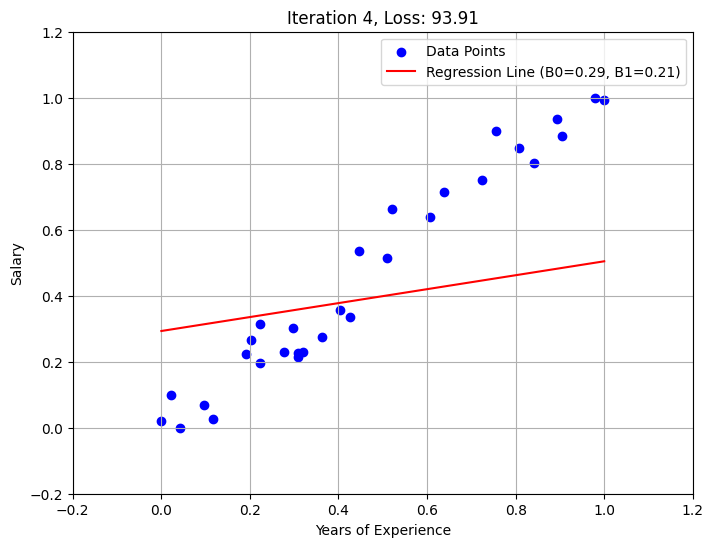

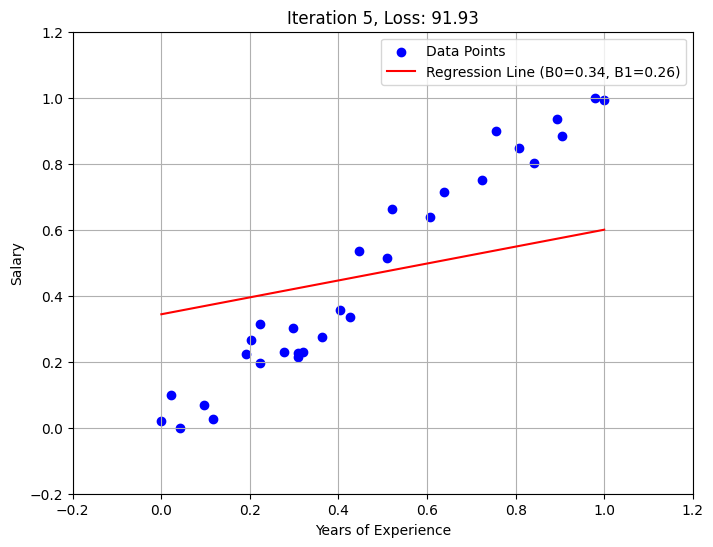

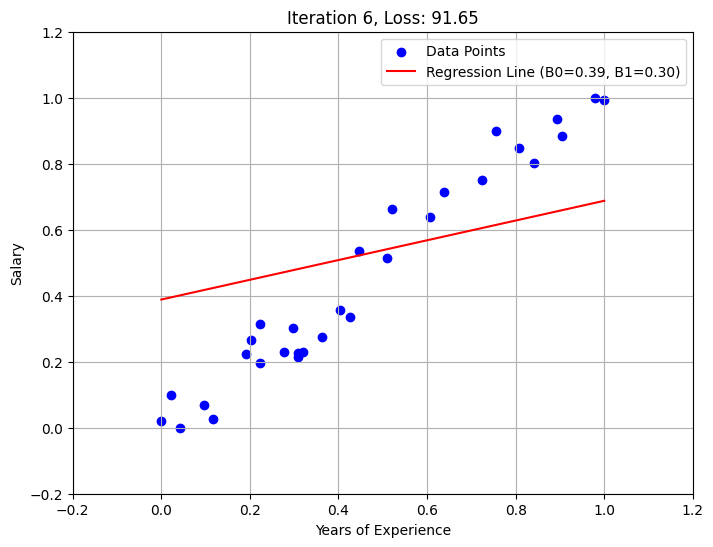

Final parameters: B0 = 0.4280, B1 = 0.3407


In [20]:
# Example usage
B0_init = 0.0
B1_init = 0.0
learning_rate = 0.1
tolerance = 1e-6
max_iterations = 1000

# Train the model
B0_final, B1_final, history = linear_regression(data, B0_init, B1_init, learning_rate, tolerance, max_iterations)
print(f"Final parameters: B0 = {B0_final:.4f}, B1 = {B1_final:.4f}")

<span style="color:red; font-size:25px;">**Plot Loss Curve..**</span>

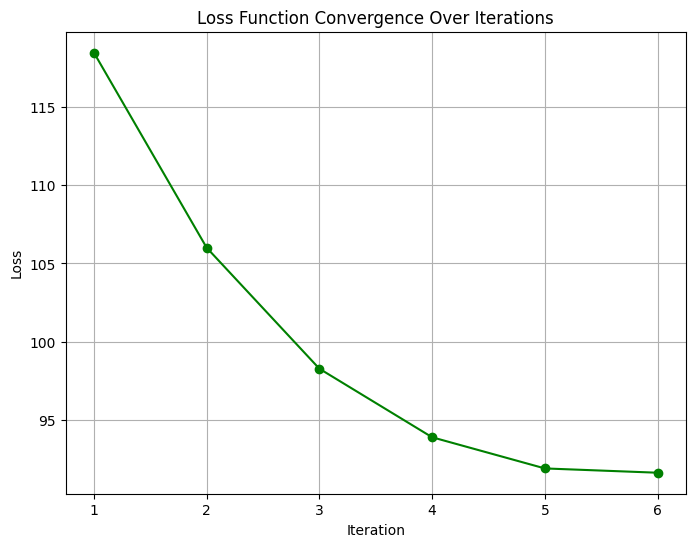

In [21]:
history = np.array(history)
plt.figure(figsize=(8, 6))
plt.plot(history[:, 0], history[:, 3], marker='o', linestyle='-', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Convergence Over Iterations')
plt.grid(True)
plt.show()

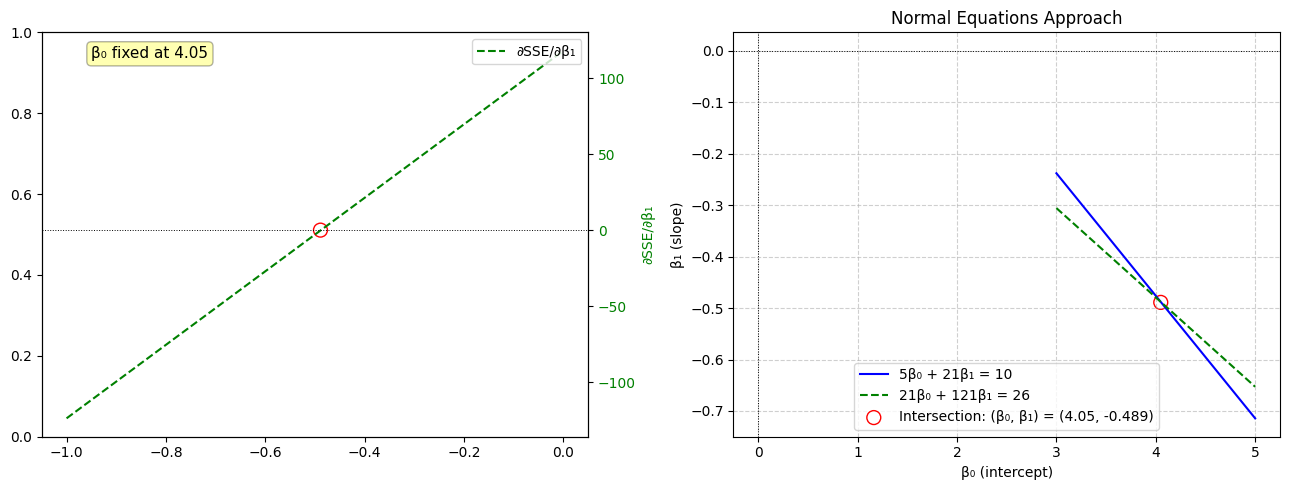